In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
car = pd.read_csv("./car+evaluation/car.data", header=None)
car.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
car.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   object
 1   Maint       1728 non-null   object
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   object
 4   LugBoot     1728 non-null   object
 5   Safety      1728 non-null   object
 6   Evaluation  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
car.Buying.replace(('vhigh', 'high', 'med', 'low'), (1, 2, 3, 4), inplace=True)
car.Maint.replace(('vhigh', 'high', 'med', 'low'), (1,2,3,4), inplace=True)
car.Doors.replace(('2', '3', '4', '5more'), (1,2,3,4), inplace=True)
car.Persons.replace(('2', '4', 'more'), (1,2,3), inplace=True)
car.LugBoot.replace(('small', 'med', 'big'), (1, 2, 3), inplace=True)
car.Safety.replace(('low', 'med', 'high'), (1,2,3), inplace=True)
car.Evaluation.replace(('unacc', 'acc', 'good', 'vgood'), (1,2,3,4), inplace=True)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Buying      1728 non-null   int64
 1   Maint       1728 non-null   int64
 2   Doors       1728 non-null   int64
 3   Persons     1728 non-null   int64
 4   LugBoot     1728 non-null   int64
 5   Safety      1728 non-null   int64
 6   Evaluation  1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [22]:
display(car)

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,3
1724,4,4,4,3,2,3,4
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,3


In [9]:
car.describe()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000


In [10]:
#Checking whether the dataset contains any null values
print(car.isna().values.any())
print(car.isnull().values.any())

False
False


In [11]:
correlation_matrix = car.corr()
correlation_matrix["Evaluation"]

Buying        0.282750
Maint         0.232422
Doors         0.066057
Persons       0.341707
LugBoot       0.157932
Safety        0.439337
Evaluation    1.000000
Name: Evaluation, dtype: float64

In [12]:
#Separating the Independent and the Dependent Variables
X = car.drop("Evaluation", axis=1)
X = X.values
y = car["Evaluation"]
y = y.values

In [13]:
#Creating an numpy array for the data points obtained from the correlation matrix
new_data_point = np.array([
    0.282750,
    0.232422,
    0.066057,
    0.341707,
    0.157932,
    0.439337,
])

In [14]:
#Calculating the Distance between the new datapoint and the each of the datapoints in the zoo dataset
#the length of the vector is called the norm. The norm is a positive value that indicates the magnitude of the vector.
distances = np.linalg.norm(X - new_data_point, axis =1) #This will give the vector of distances

In [20]:
#Keeping the Number of neighbors to be 6 (k = 6)
#We are going to sort the distances from lowest to highest using argsort

k = 6
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids #These three neighbors are closer to the target variable

array([  0,   1,   9, 432, 108,   3], dtype=int64)

In [21]:
#Combining those neighbors for prediction
#finding the ground truth
nearest_neighbor_type = y[nearest_neighbor_ids]
nearest_neighbor_type

array([1, 1, 1, 1, 1, 1], dtype=int64)

Prediction

Mean for Regression

In [23]:
#Prediction - Regression
prediction = nearest_neighbor_type.mean()
prediction # This means that the 6-Nearest Neighbor prediction for the new data point is the value we get

1.0

Mode for Classification

In [26]:
#To calculate Mode

import scipy.stats
class_neighbors = np.array(car["Evaluation"])
scipy.stats.mode(class_neighbors)


ModeResult(mode=array([1], dtype=int64), count=array([1210]))

Fitting the KNN Model

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

In [28]:
#For Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_model_regression = KNeighborsRegressor(n_neighbors=6) #This is the Value of K
knn_model_regression.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [29]:
#For Classification
from sklearn.neighbors import KNeighborsClassifier
knn_model_classification = KNeighborsClassifier(n_neighbors=5)
knn_model_classification.fit(X_train, y_train)

KNeighborsClassifier()

Evaluating the Model - Regression

In [30]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
y_pred_regression = knn_model_regression.predict(X_test)
mae_regression = mean_absolute_error(y_test, y_pred_regression)
print("Mean Absolute Error (MAE): ", mae_regression)

Mean Absolute Error (MAE):  0.2013487475915222


In [31]:
#Root Mean Square Error (RMSE)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model_regression.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print("RMSE on Train Data: ",rmse_train)

mse_test = mean_squared_error(y_test, y_pred_regression)
rmse_test = sqrt(mse_test)
print("RMSE on Test Data: ", rmse_test)

RMSE on Train Data:  0.2515004143411075
RMSE on Test Data:  0.3214816639979277


In [32]:
#R-Squared (R2) Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_regression)
print("R-Squared (R2) Score: ", r2)

R-Squared (R2) Score:  0.8188512127088241


Evaluating the Model - Classification

In [33]:
#Accuracy Score
from sklearn.metrics import accuracy_score
y_pred_classification = knn_model_classification.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_classification)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.9190751445086706


In [34]:
#Confusion Matrix - For Evaluating Class-Wise Performance

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classification)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[364   3   0   0]
 [ 17  92   0   0]
 [  2  12   7   1]
 [  2   4   1  14]]


In [35]:
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classification)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.99      0.97       367
           2       0.83      0.84      0.84       109
           3       0.88      0.32      0.47        22
           4       0.93      0.67      0.78        21

    accuracy                           0.92       519
   macro avg       0.90      0.71      0.76       519
weighted avg       0.92      0.92      0.91       519



Choosing the Best K value

In [36]:
#Getting the Accruacy Scores for differect values of n

from sklearn.model_selection import cross_val_score
k_list = np.arange(1, 50, 2)
accuracy_list = []
mean_scores = []
error_rate = []

X_train_np = np.ascontiguousarray(X_train)
y_train_np = np.ascontiguousarray(y_train)
X_test_np = np.ascontiguousarray(X_test)

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_np, y_train_np)
    pred_i = knn.predict(X_test_np)
    score = cross_val_score(knn, X_train_np, y_train_np, cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))
    accuracy = accuracy_score(y_test, pred_i)
    accuracy_list.append(accuracy)

accuracy_data = pd.DataFrame({'k': k_list, 'Accuracy': accuracy_list})
print(accuracy_data)

     k  Accuracy
0    1  0.828516
1    3  0.892100
2    5  0.919075
3    7  0.922929
4    9  0.909441
5   11  0.895954
6   13  0.884393
7   15  0.880539
8   17  0.882466
9   19  0.880539
10  21  0.888247
11  23  0.886320
12  25  0.880539
13  27  0.880539
14  29  0.888247
15  31  0.870906
16  33  0.870906
17  35  0.867052
18  37  0.859345
19  39  0.859345
20  41  0.863198
21  43  0.855491
22  45  0.847784
23  47  0.847784
24  49  0.847784


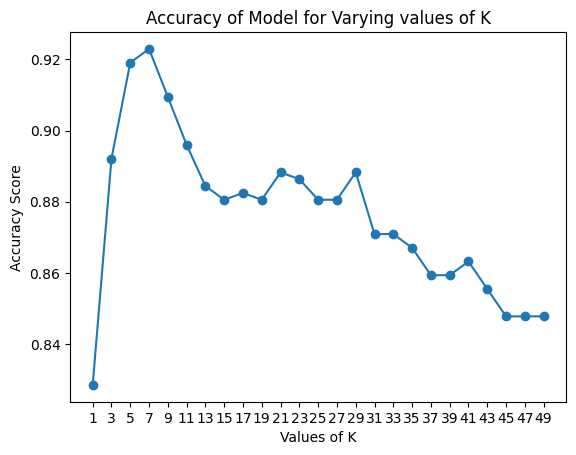

In [37]:
#Visualization of Model performance of Different k values

#Plot n values and accuracy scores
plt.plot(k_list, accuracy_list, marker='o')
plt.title('Accuracy of Model for Varying values of K')
plt.xlabel('Values of K')
plt.ylabel("Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12, 12)
plt.show()

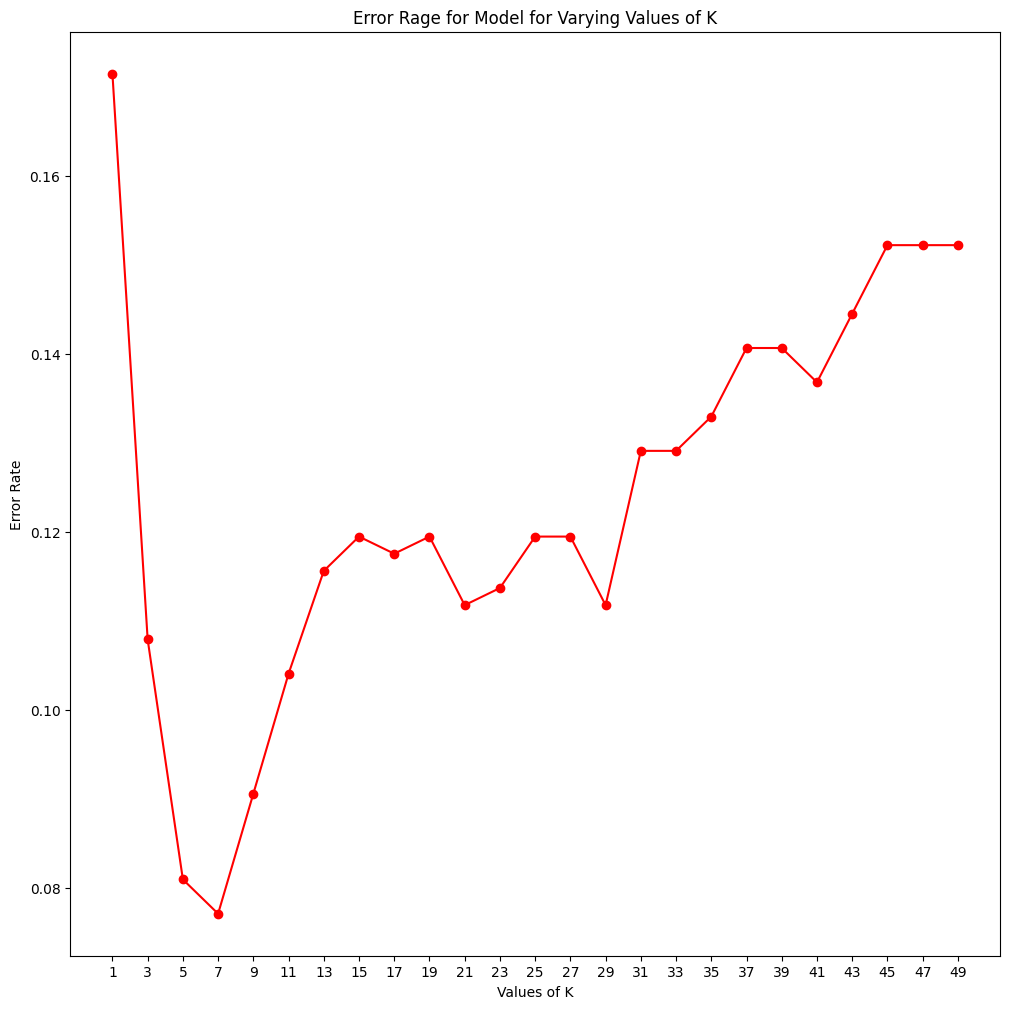

In [38]:
#Plotting K values against the error rate
plt.plot(k_list, error_rate, color='red', marker='o')
plt.title('Error Rage for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12, 12)
plt.show()

Finding the best value for K - Tuning and Optimizing KNN

In [39]:
#Using GridSearchCV Fitting the Model using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50), "weights" : ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [40]:
#In the end, it will retain the best performing value of k
gridsearch.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [41]:
#How the best value of k affects the train and test performances
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse_grid = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse_grid = mean_squared_error(y_test, test_preds_grid)
test_rmse_grid = sqrt(test_mse_grid)
print("The Root Mean Squared Value for Train Dataset: ", train_rmse_grid)
print("The Root Mean Squared Value for Test Dataset: ", test_rmse_grid)

#We can see the both the train and test errors improved

The Root Mean Squared Value for Train Dataset:  0.0
The Root Mean Squared Value for Test Dataset:  0.32037165656629973


In [42]:
#Checking whether the performance of the Model will be any better when predicting using a weighted average instead of a regular average

parameters = {
    "n_neighbors": range(1, 50),
    "weights" : ["uniform", "distance"],
}

gridsearch_WeightedAverage = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch_WeightedAverage.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [43]:
gridsearch_WeightedAverage.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [44]:
test_preds_grid = gridsearch_WeightedAverage.predict(X_test)
test_mse_weight = mean_squared_error(y_test, test_preds_grid)
test_rmse_weight = sqrt(test_mse_weight)
test_rmse_weight #Here we get a worser performance than the regular average

0.32037165656629973

In [45]:
#Further Tuning the KNN with Bagging

#Creating a KNeighborsRegressor using the best choices for k
best_k = gridsearch_WeightedAverage.best_params_["n_neighbors"]
best_weights = gridsearch_WeightedAverage.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [46]:
#Import the BaggingRegressor class from Scikit-learn and create a new instance with 100 estimators using the bagged_knn model

from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

#Fitting the Bagging_model with the training data
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(weights='distance'),
                 n_estimators=100)

In [47]:
#Making the Prediction and Calculating the RMSE to see it it improved
test_preds_grid = bagging_model.predict(X_test)
test_mse_bagging = mean_squared_error(y_test, test_preds_grid)
test_rmse_bagging = sqrt(test_mse_bagging)
test_rmse_bagging

0.31769866850074224

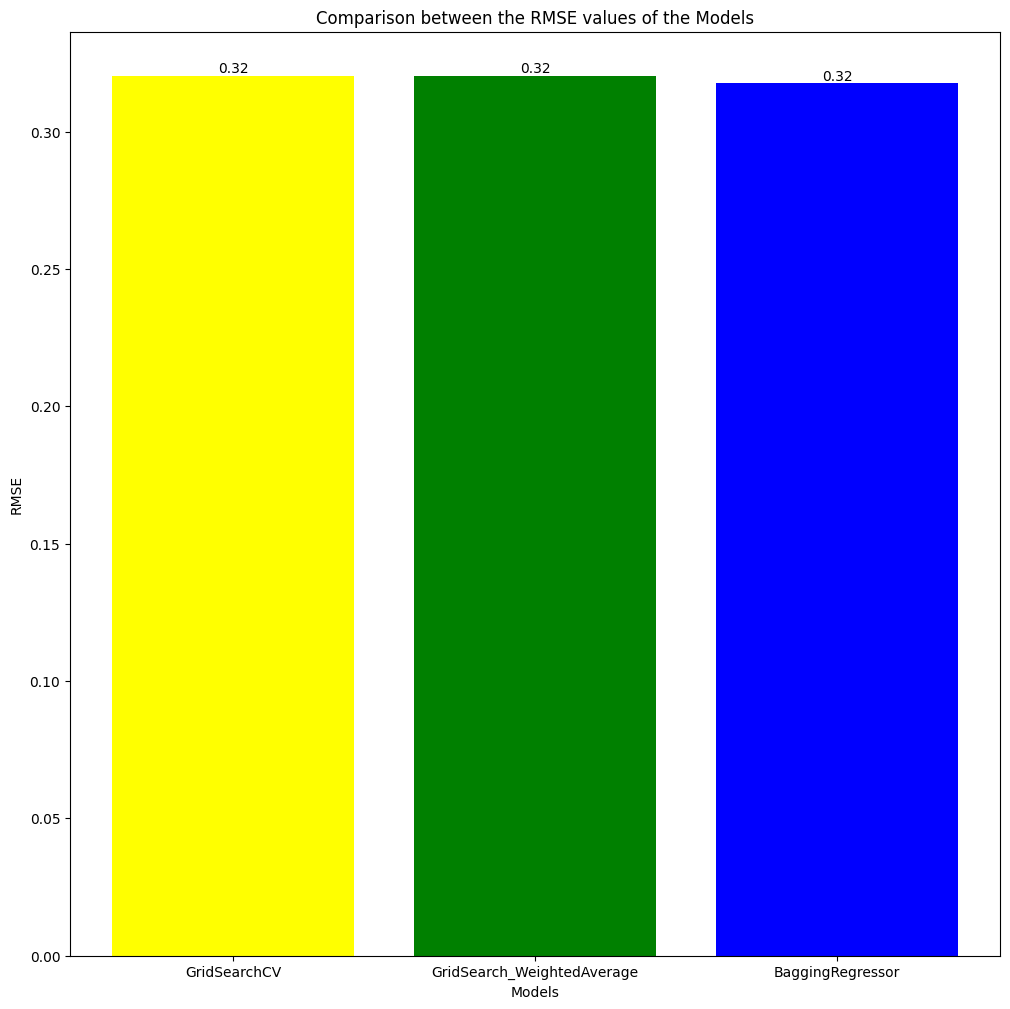

In [48]:
#Comparison on Models

test_rmse = [test_rmse_grid, test_rmse_weight, test_rmse_bagging]
tests = ['GridSearchCV', 'GridSearch_WeightedAverage', 'BaggingRegressor']
plt.bar(tests, test_rmse, color=['yellow', 'green', 'blue'])
plt.title('Comparison between the RMSE values of the Models')
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.xticks(range(len(tests)), tests)
# Add annotations to the bars
for i, rmse in enumerate(test_rmse):
    plt.text(i, rmse, f'{rmse:.2f}', ha='center', va='bottom')
plt.show()
